In [1]:
import os
import sys
sys.path.insert(0, "%s/hgcalEnv/lib/python3.6/site-packages/"%os.getcwd())

import uproot4
import random
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName = f'data_Events_4807336_0.csv'
branchList = ['entry','layer','waferu','waferv','HDM','TotalWords', "TotalWords_NZS"]
dataZS = pd.read_csv(fileName)[branchList]

#get list of wedges, and assign x and y positions for drawing maps
wedges = dataZS.groupby(['layer','waferu','waferv']).any()[['HDM']].reset_index()
wedges['y'] = wedges.waferv
wedges['x'] = 0
#QQQQ: why 2+v-2*u?
wedges.loc[:,'x'] = (2+wedges.y-2*wedges.waferu)
#QQQQ: why rescale y and x?
wedges.y *= 1.5
wedges.x *= -3**.5/2
wedges.set_index(['layer','waferu','waferv'],inplace=True)

(7, 8, 5)
[[15, 19, 18, 26, 16, 18, 20, 27, 22, 21, 26, 21, 20, 28, 14, 12, 18, 16, 27, 18, 17, 16, 18, 20, 16, 24, 28, 20, 28, 18, 26, 19, 20, 18, 36, 22, 20, 20, 23, 27, 27, 16, 21, 17, 21, 18, 28, 26, 19, 26, 20, 21, 17, 32, 18, 16, 20, 22, 27, 20, 18, 21, 16, 23, 18, 28, 23, 18, 18, 21, 27, 22, 21, 28, 20, 17, 28, 15, 29, 23, 31, 22, 20, 21, 19, 20, 26, 25, 24, 16, 26, 22, 17, 25, 19, 13, 18, 23, 31, 14, 23, 16, 14, 19, 28, 28, 26, 21, 24, 22, 19, 17, 18, 18, 30, 36, 27, 23, 22]]
[[82, 160, 82, 160, 121, 160, 160, 238, 199, 160, 160, 160, 199, 238, 82, 43, 121, 121, 199, 160, 121, 82, 121, 160, 121, 199, 238, 160, 199, 160, 199, 160, 160, 160, 238, 199, 160, 160, 199, 238, 199, 121, 160, 121, 160, 160, 199, 199, 160, 199, 160, 160, 121, 199, 160, 121, 160, 199, 199, 160, 121, 199, 121, 160, 121, 238, 160, 121, 121, 160, 238, 199, 199, 238, 160, 82, 238, 82, 238, 199, 238, 160, 121, 199, 160, 199, 199, 199, 199, 82, 199, 199, 121, 160, 160, 43, 121, 160, 160, 82, 199, 121, 82, 160, 

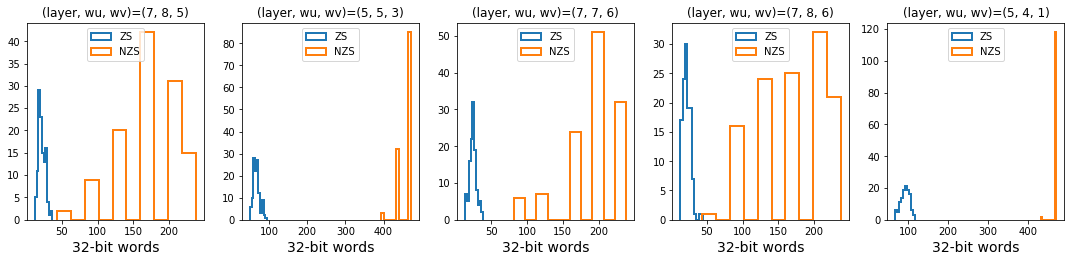

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
count = 1
plt.subplots(figsize=(15, 10))

group = dataZS.reset_index().groupby(['layer', 'waferu','waferv', 'HDM'])
histDF = group['TotalWords'].apply(list).reset_index()
histDF2 = group['TotalWords_NZS'].apply(list).reset_index()

for h in range(5):
    #print(count)
    luv = random.choice(wedges.index)
    print(luv)
    plt.subplot(3, 5, count)
    sel = (histDF.layer==luv[0]) & (histDF.waferu==luv[1]) & (histDF.waferv==luv[2])
    histList = histDF.loc[sel, 'TotalWords'].to_list()
    histList_NZS = histDF2.loc[sel, 'TotalWords_NZS'].to_list()
    print(histList)
    print(histList_NZS)
    plt.hist(histList, label="ZS", histtype='step', linewidth=2)
    plt.hist(histList_NZS, label="NZS", histtype='step', linewidth=2)
    plt.title("(layer, wu, wv)=%s"%str(luv))
    plt.xlabel("32-bit words", size=14)
    plt.legend(loc='upper center')
    #plt.yscale('log')
    count+=1
plt.show()